# Charts to compare electricity demand with ambient temperature

In [1]:
# setwd('./College/ssen/ssen_weather_combine')
data <- read.csv("./database/combined_ssen_weather.csv", header=TRUE, sep=",", dec=".")

In [2]:
# generate a column with dates in correct datetime type
data$dt <- as.POSIXct(data$elec_timestamp,format="%Y-%m-%d %H:%M:%S",tz="GMT")

In [3]:
#  set default output size for plots to 8 inches by 4 inches.
options(repr.plot.width=10, repr.plot.height=6)
#library allowing alpha blend colour
library(scales)

In [5]:
#  get column headings for the dataset 
colnames(data)

[1] "X.1"                       "elec_timestamp"           
 [3] "demand"                    "demand_max"               
 [5] "anm_generated"             "non_anm_generated"        
 [7] "total_generation_capacity" "ANM_timestamp"            
 [9] "operation_core"            "eqpt_core"                
[11] "site_core"                 "operation_1"              
[13] "eqpt_1"                    "site_1"                   
[15] "operation_1A"              "eqpt_1A"                  
[17] "site_1A"                   "operation_2"              
[19] "eqpt_2"                    "site_2"                   
[21] "operation_2A"              "eqpt_2A"                  
[23] "site_2A"                   "operation_2B"             
[25] "eqpt_2B"                   "site_2B"                  
[27] "operation_3"               "eqpt_3"                   
[29] "site_3"                    "operation_4"              
[31] "eqpt_4"                    "site_4"                   
[33] "operation_4A"              "eqpt_4A"                  
[35] "site_4A"                   "dt"                       
[37] "X"                         "dt..37"                   
[39] "approxWindSpeed"           "approxWindDirection"      
[41] "approxPressure"            "approxTemp"

## Plot charts for demand and temperature over the recording period.

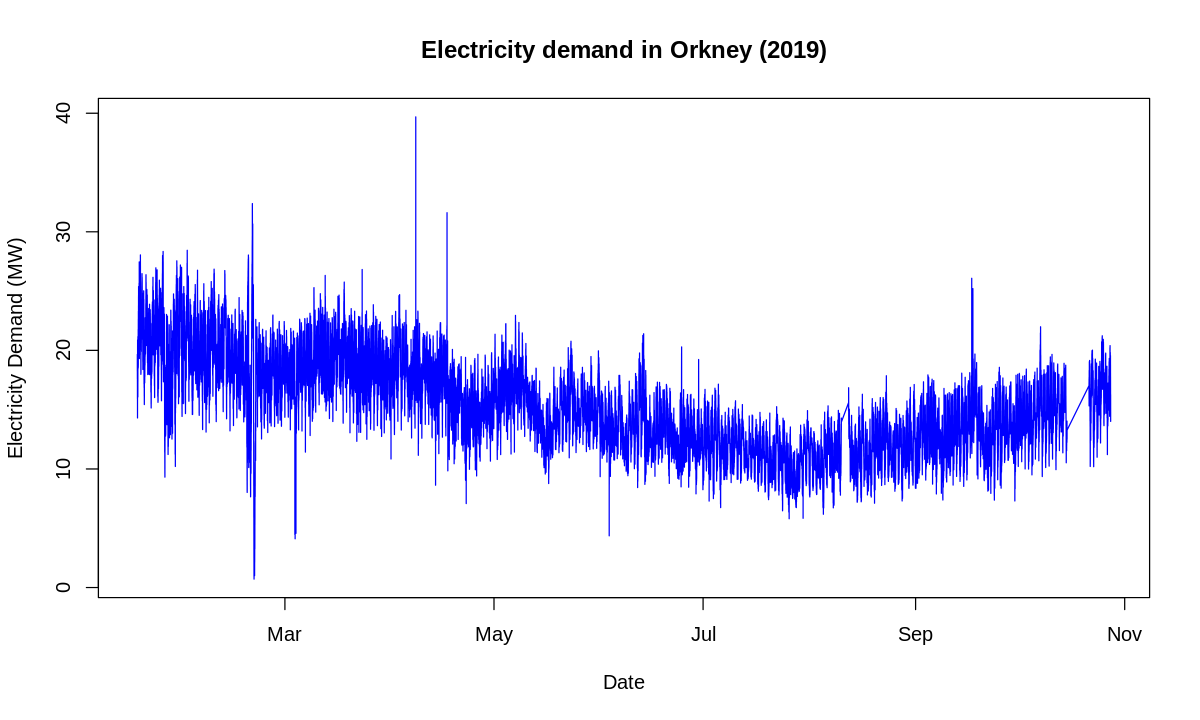

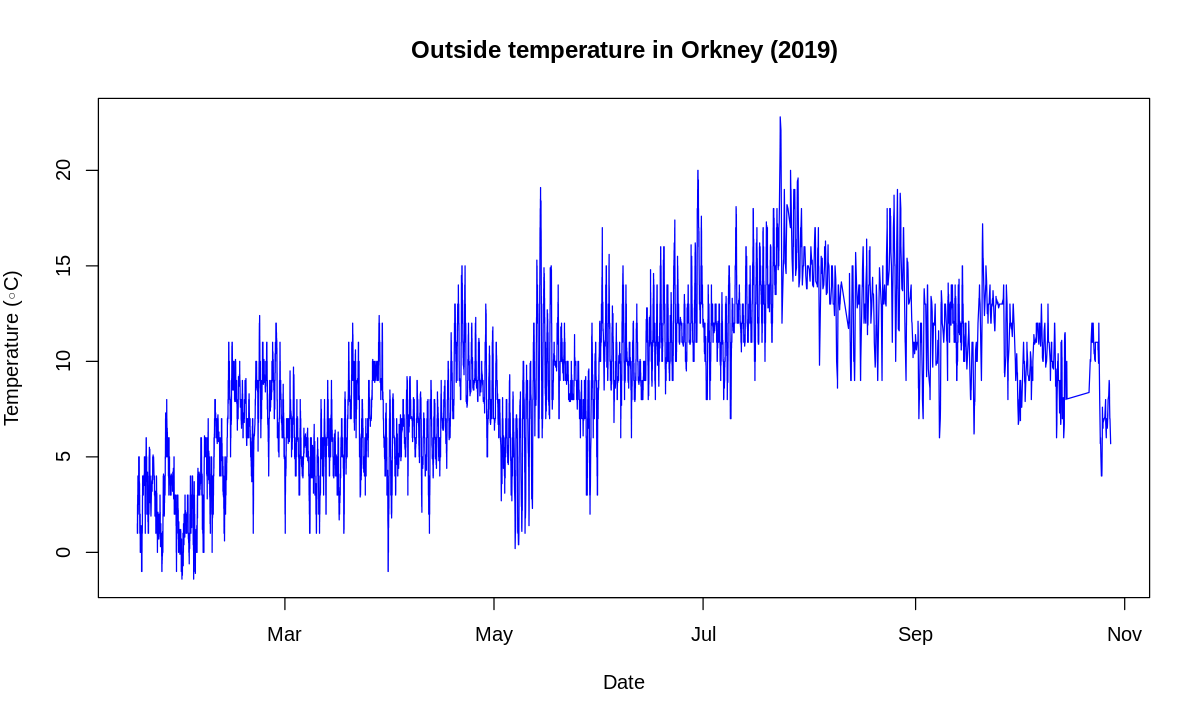

In [9]:
plot(data$dt, data$demand, main= "Electricity demand in Orkney (2019)",
     xlab = "Date",
     ylab= "Electricity Demand (MW)",
     type= "l", col = "blue")
plot(data$dt, data$approxTemp, main= "Outside temperature in Orkney (2019)",
     xlab = "Date",
     ylab= expression(paste("Temperature (",degree,"C)")),
     type= "l", col = "blue")

By overlaying the two charts the correlation in peaks and troughs can be seen more readily

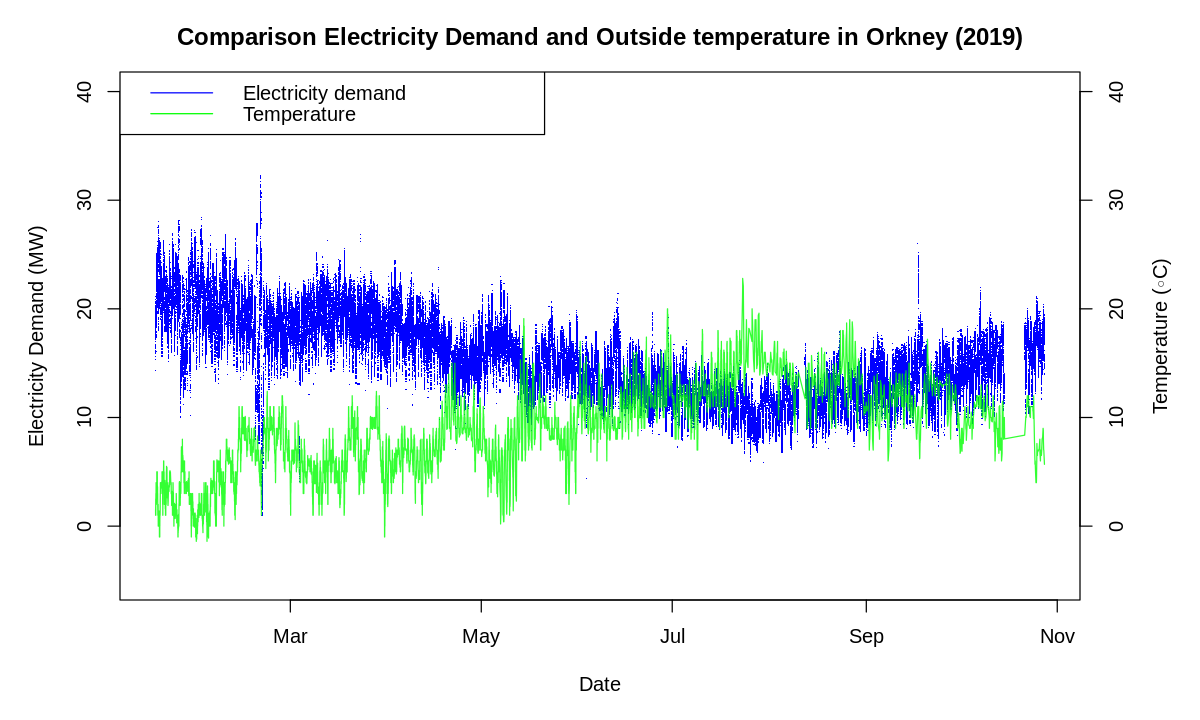

In [22]:
# plot windspeed over year
par(mar = c(5, 5, 3, 5))
plot(data$dt, data$demand, main= "Comparison Electricity Demand and Outside temperature in Orkney (2019)",
     xlab = "Date",
     ylab= "Electricity Demand (MW)",
     type= "p", col = alpha(c("blue", 0.5)), pch=46, ylim=c(-5, 40))
points(data$dt, data$approxTemp, ylim=c(-5, 25),type= "l", col=alpha(c("green"), 0.8))
axis(side = 4)
mtext(expression(paste("Temperature (",degree,"C)")), side = 4, line = 3)
legend("topleft", legend=c("Electricity demand", "Temperature"),
       col=c("blue", "green"), lty=1)

There is clearly a correlation between electricity demand and the outside temperature.
As well as the general seasonal trend of high energy consumption the winter and lower energy consuption in the summer months, irregular peaks and troughs clearly correspond in the two traces.  For example, during May, a sharp cold spell, followed by unusually high temperature makes very pronounced corresponding features in the demand chart.

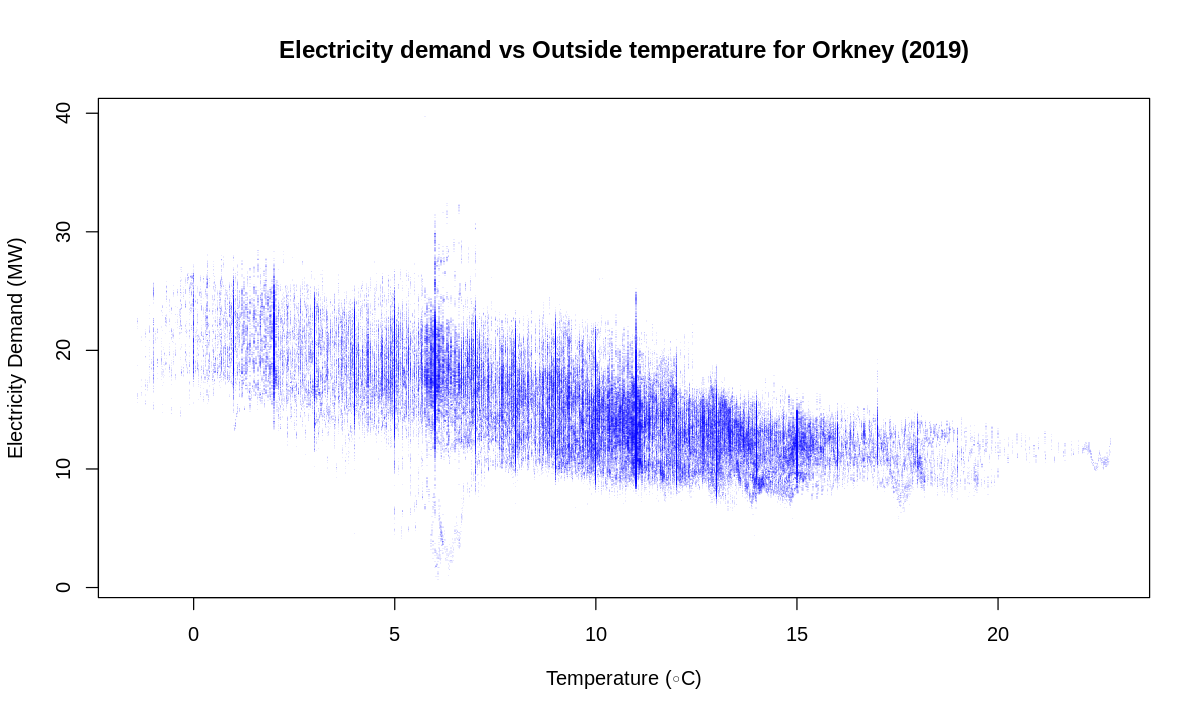

In [23]:
plot(data$approxTemp, data$demand, main='Electricity demand vs Outside temperature for Orkney (2019)',
     ylab= "Electricity Demand (MW)",
     xlab= expression(paste("Temperature (",degree,"C)")),
     type="p",col=alpha(c("blue"), 0.08), pch=46)

The relationship between demand and temperature is clearly linear with good correlation.  The vertical lines on the chart are artefacts of the interpolation of the weather data which was recorded with a realtively coarse prescision.

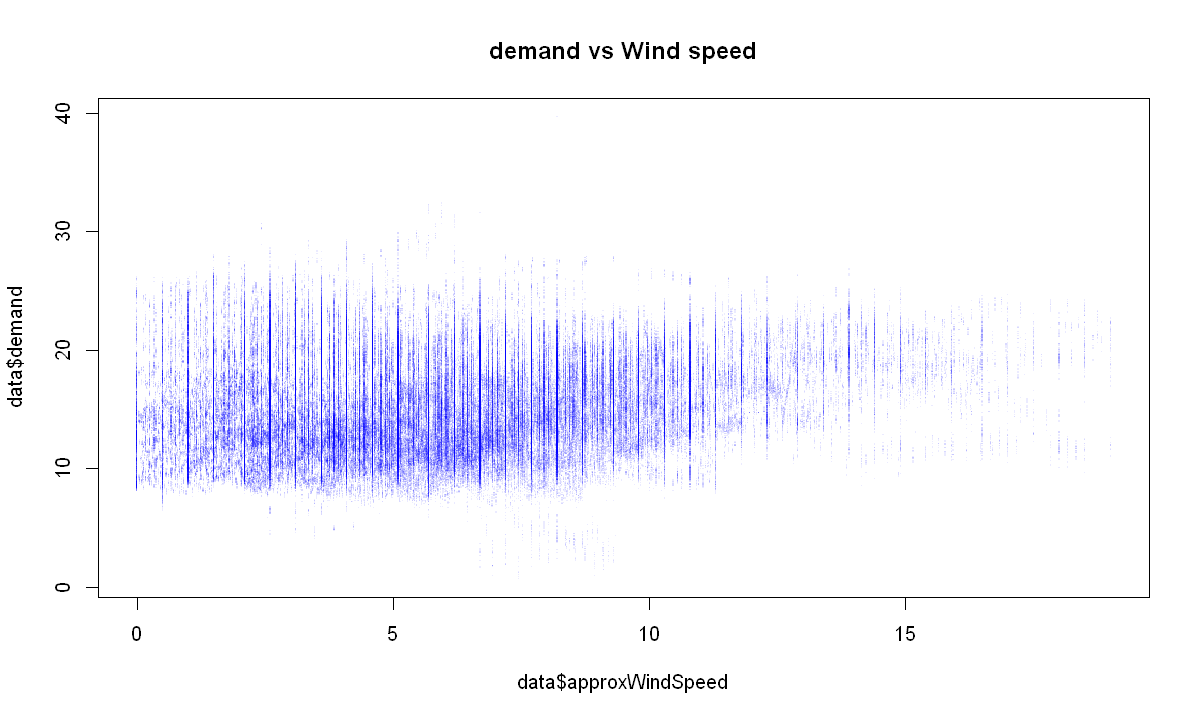

In [7]:
plot(data$approxWindSpeed, data$demand, main='demand vs Wind speed', type="p",col=alpha(c("blue"), 0.08), pch=46)

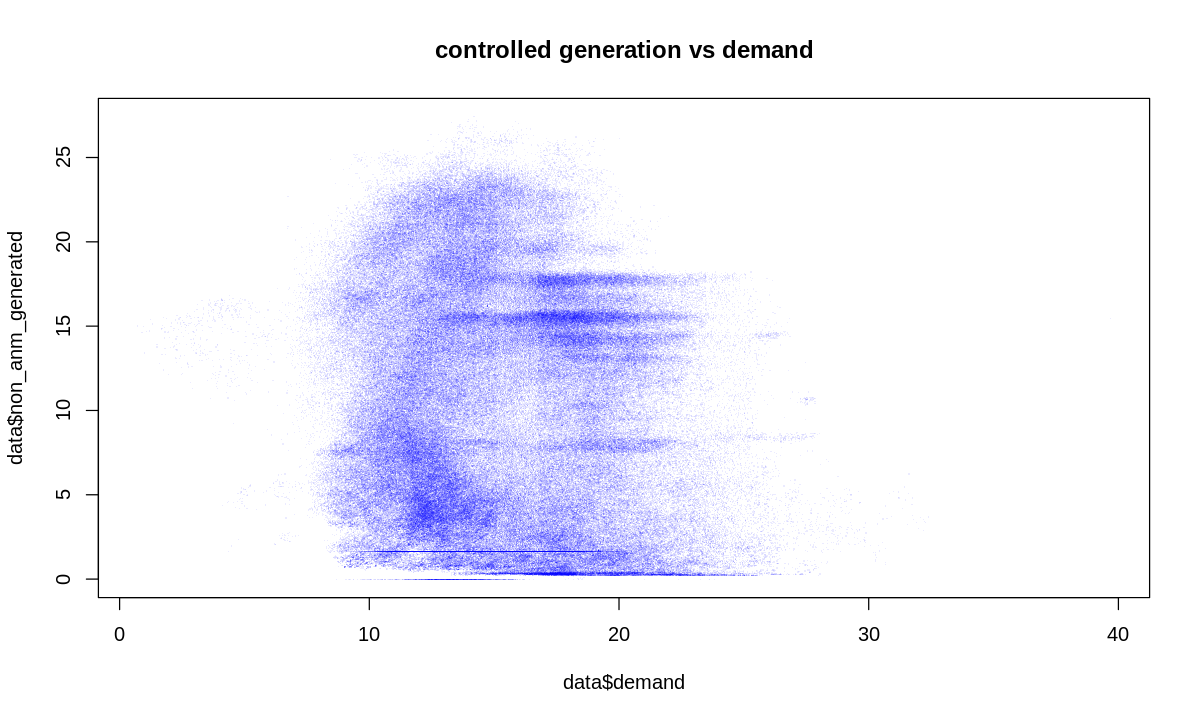

In [4]:
plot(data$demand, data$non_anm_generated, main='controlled generation vs demand', type="p",col=alpha(c("blue"), 0.08), pch=46)

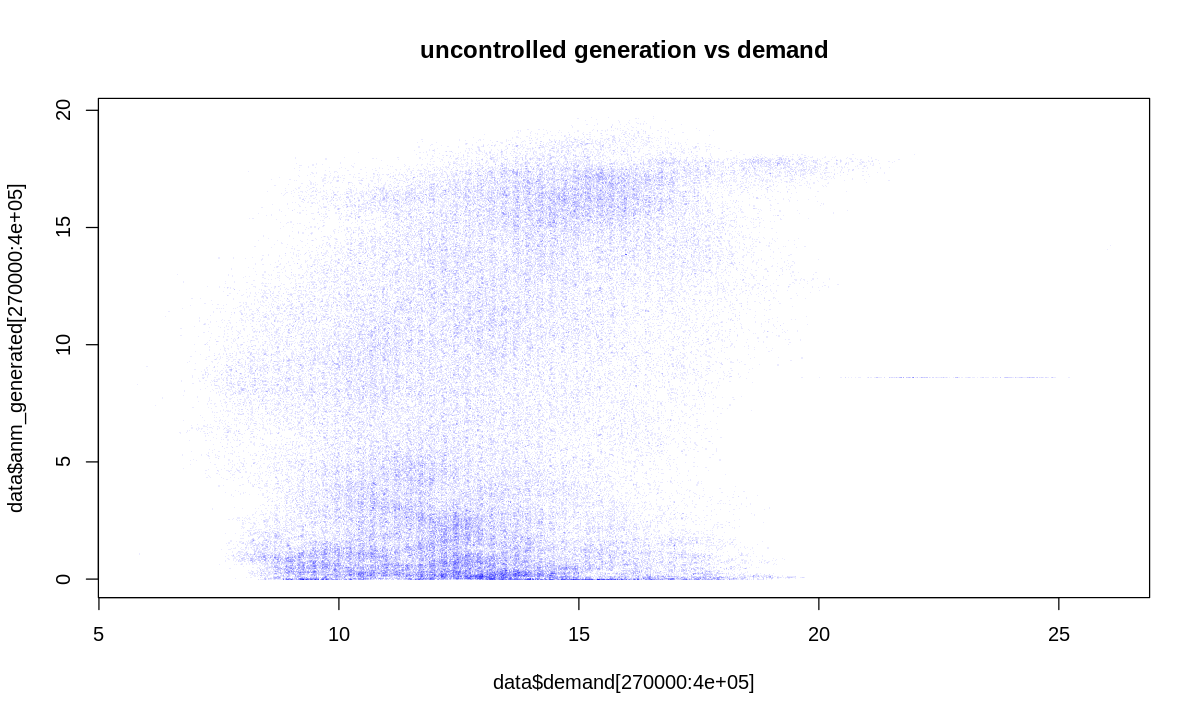

In [9]:
plot(data$demand[270000:400000], data$anm_generated[270000:400000], main='uncontrolled generation vs demand', type="p",col=alpha(c("blue"), 0.08), pch=46)

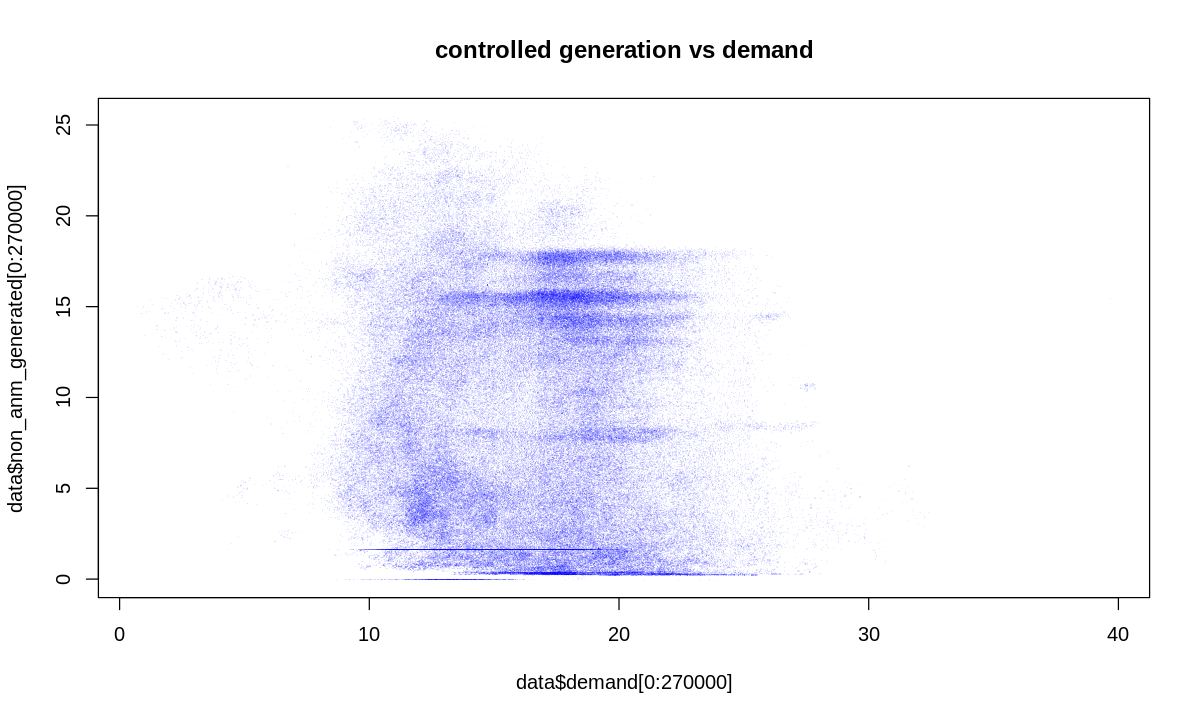

In [5]:
plot(data$demand[0:270000], data$non_anm_generated[0:270000], main='controlled generation vs demand', type="p",col=alpha(c("blue"), 0.08), pch=46)

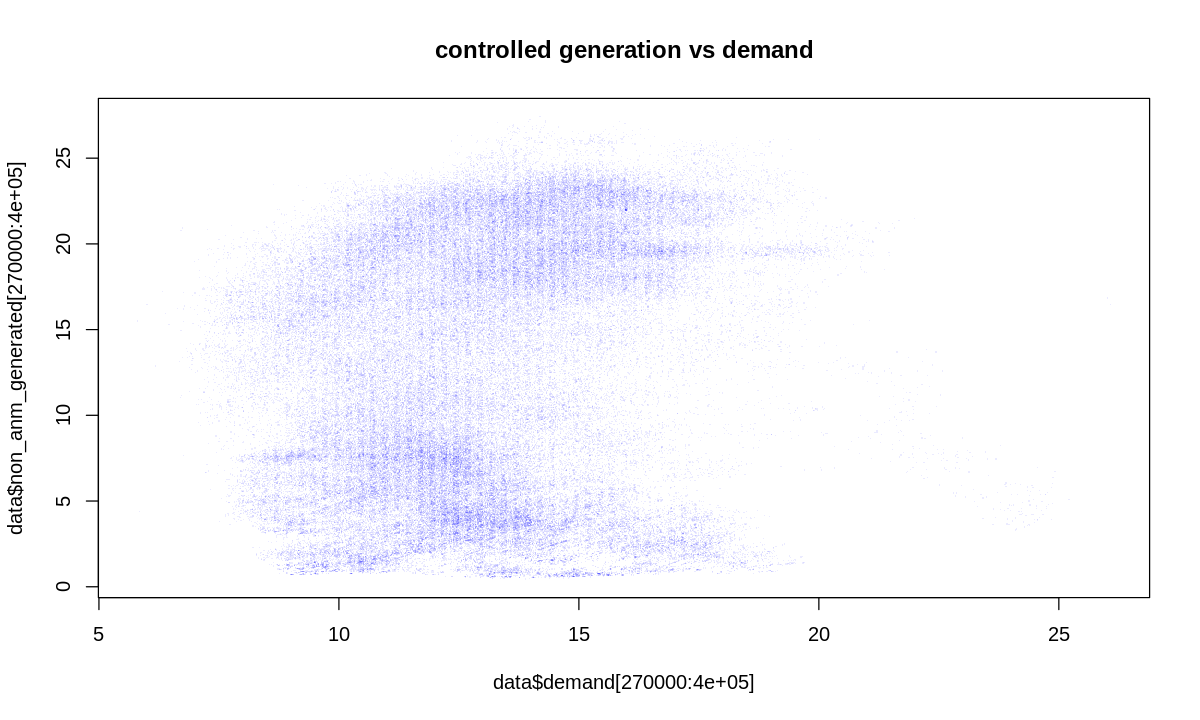

In [7]:
plot(data$demand[270000:400000], data$non_anm_generated[270000:400000], main='controlled generation vs demand', type="p",col=alpha(c("blue"), 0.08), pch=46)